In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
print('Library Loaded')

Library Loaded


In [3]:
import io
import requests
def iterable_to_stream(iterable, buffer_size=io.DEFAULT_BUFFER_SIZE):
    class IterStream(io.RawIOBase):
        def __init__(self):
            self.leftover = None
        def readable(self):
            return True
        def readinto(self, b):
            try:
                l = len(b)
                chunk = self.leftover or next(iterable)
                output, self.leftover = chunk[:l], chunk[l:] # chunk, up to limit
                b[:len(output)] = output 
                return len(output)
            except StopIteration:
                return 0
    return io.BufferedReader(IterStream(), buffer_size=buffer_size)


In [4]:
url = "https://raw.githubusercontent.com/cosmicudemy/ML_Casestudies/master/diabetes/diabetes.csv"

In [5]:
response = requests.get(url, stream=True)
next(response.iter_content())
df = pd.read_csv(iterable_to_stream(response.iter_content()), sep=',')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regnancies                768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

regnancies                  0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

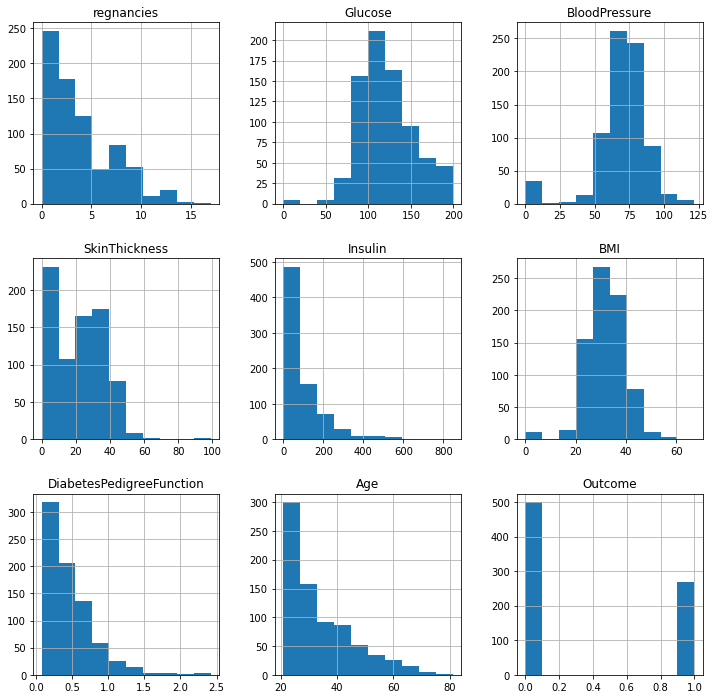

In [14]:
df.hist(figsize=(12,12))
plt.show()

In [ ]:
## Impute after splitting.  


In [8]:
X = df.drop('Outcome',axis=1) # predictor feature coloumns
y = df.Outcome

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 614
Test Set : 154
Training labels : 614
Test Labels : 154


In [9]:
from sklearn.impute import SimpleImputer
fill = SimpleImputer(missing_values = 0, strategy="mean")

In [10]:
X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

In [13]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
   
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

    train = pd.concat([y_train, x_train], axis=1)
    train.to_csv("./train.csv", index=False, header=False)
    y_train.to_csv("./Y-train.csv", index=False, header=False)

    test = pd.concat([y_test, x_test], axis=1)
    test.to_csv("./test.csv", index=False, header=False)
    y_test.to_csv("./Y-test.csv", index=False, header=False)

    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    pickle.dump(grid_result,open(algo_name+'.pkl','wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

In [10]:
# Logit
penalty = ["l1", "l2"]
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

In [11]:
FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0]
Best Params : {'C': 21.544346900318832, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.79      0.56      0.65        54

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154

Accuracy Score : 0.7922077922077922
Confusion Matrix : 
 [[92  8]
 [24 30]]


/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/aws_deploy_diabetes/venvdiab/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76713315        nan 0.76711982        nan 0.77037185
        nan 0.77686259        nan 0.76548047        nan 0.76224177
        nan 0.76222844        nan 0.75897641        nan 0.76061575
        nan 0.76711982]
  warnings.warn(
/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/aws_deploy_diabetes/venvdiab/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [13]:
### Oversample to improve performance
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
# SMOTE works by: 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=867)
X_res_OS, Y_res_OS = sm.fit_resample(X, y)

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X_res_OS, Y_res_OS, test_size = 0.20, random_state = 11)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 800
Test Set : 200
Training labels : 800
Test Labels : 200


In [16]:
X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

In [17]:
# Logit
penalty = ["l1", "l2"]
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0]
Best Params : {'C': 10000.0, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.74      0.72      0.73       109
           1       0.68      0.69      0.68        91

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

Accuracy Score : 0.71
Confusion Matrix : 
 [[79 30]
 [28 63]]


/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/aws_deploy_diabetes/venvdiab/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [    nan 0.72875     nan 0.73        nan 0.73375     nan 0.72625     nan
 0.73125     nan 0.725       nan 0.72875     nan 0.73125     nan 0.73125
     nan 0.73375]
  warnings.warn(
/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/aws_deploy_diabetes/venvdiab/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# To fit XGboost: grid search over this dict of param values.
param = {
    "n_estimators": [100, 600, 1200],  # why should this cross 2 orders of magnitude?
    "max_depth": [2, 3, 4, 5],  # depth of sequential classifiers
    "learning_rate": np.arange(0.01, 0.1, 0.01).tolist(),  # controls the greediness
}
FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/aws_deploy_diabetes/venvdiab/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:57:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0]
Best Params : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2000}
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.80      0.80       109
           1       0.76      0.77      0.77        91

    accuracy                           0.79    

In [19]:
# To fit random forest:
param = {
    "n_estimators": [100, 500, 1000, 1500, 2000]
}
FitModel(X_train,y_train,X_test,y_test,'RandomForest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0]
Best Params : {'n_estimators': 2000}
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.79      0.83       109
           1       0.77      0.86      0.81        91

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Accuracy Score : 0.82
Confusion Matrix : 
 [[86 23]
 [13 78]]
